In [109]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
from tqdm.notebook import tqdm
import hazm
import re
import os
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib as mpl
from colorama import Fore, Back, Style
plt.rcParams['figure.dpi']=200
plt.rcParams['savefig.dpi']=200
plt.rcParams["font.family"] = "Yas"

### Target Text

In [110]:
#prose = 'تعریف شبکه‌ی ارجاعات یا استنادات. شبکه‌ی ارجاعات یا استنادات برای مدل کردن ارجاع دادن توسط یک مقاله، به مقالات دیگر گفته می‌شود. این شبکه را می‌توان به صورت یک گراف جهت‌دار نشان داد که در این گراف، راس‌های آن مقالات نوشته شده و یال‌های این گراف نیز دادن ارجاع به مقاله‌ای دیگر است. جهت این یال نیز از مقاله‌ی نوشته شده به سمت مقاله‌ای که به آن ارجاع داده است، می‌باشد. اهمیت شبکه‌ی ارجاعات. شبکه‌های ارجاعات برای درک تأثیر مقالات و کارهای علمی در طول زمان بسیار مهم هستند. این شبکه‌ها، به محققان کمک می‌کنند مقالات کلیدی را در هر رشته و حوزه شناسایی کنند، توسعه ایده‌ها را ردیابی کنند و تأثیر تحقیقات را در درون و بین رشته‌ها اندازه‌گیری کنند.'
#old_prose = 
#poem = 'جهاندار هوشنگ با رای و داد به جای نیا تاج بر سر نهاد بگشت از برش چرخ سالی چهل پر از هوش مغز و پر از رای دل چو بنشست بر جایگاه مهی چنین گفت بر تخت شاهنشهی که بر هفت کشور منم پادشا جهاندار پیروز و فرمانروا به فرمان یزدان پیروزگر به داد و دهش تنگ بستم کمر و زان پس جهان یک‌سر آباد کرد همه روی گیتی پر از داد کرد نخستین یکی گوهر آمد به چنگ به آتش ز آهن جدا کرد سنگ سر مایه کرد آهن آبگون کز آن سنگ خارا کشیدش برون'
#prose = 'زبان، جنبه‌ای بنیادی در ارتباط و برهم‌کنش بین انسان‌ است که نقش مهمی در انتقال افکار، ایده‌ها و احساسات دارد. پژوهشگران، در طول سال‌ها در رشته‌های مختلف، سعی کرده‌اند از منظرهای متفاوتی، برهم‌کنش‌های پیچیده‌ی زبانی را تحلیل و مطالعه کنند. یکی از پنجره‌هایی که برای نگاه کردن و مطالعه‌ی زبان‌ها می‌توان پیدا کرد، بررسی زبان‌ها به عنوان شبکه است. یکی از انواع این شبکه‌ها که می‌توان به‌وسیله‌ی آن زبان را مورد بررسی قرار داد، شبکه‌های هم‌رخدادی است به طوری که در یک متن، کلمات هم‌جوار را همسایه گرفته و بین آن‌ها می‌توانیم ارتباطی فرض کنیم. در مدل سازی این شبکه، در ساده‌ترین تقریب، کلمات مانند راس‌ گراف هستند و بین هر دو کلمه‌ی همسایه در یک جمله، یک یال رسم می‌شود. این گونه می‌توانیم این شبکه‌ی هم‌رخدادی را رسم کرده و خصوصیات آن را برای متن‌ها و شعرهای مختلف بدست آوریم.'


with open('citation.txt', 'r') as file:
    prose = file.read()
with open('poem.txt', 'r') as file:
    poem = file.read()


### Text Editing

In [111]:
normalizer = hazm.Normalizer()
lemmatizer = hazm.Lemmatizer()

def remove_strings(strings):
    pattern = r'[؟!().:،؛۱۲۳۴۵۶۷۸۹۰«»٫،\.]'
    return [s for s in strings if not any(re.findall(pattern, s))]
def lemmatizer_text(jomle):
    normalizer.normalize(jomle)
    tokenized_jomle = hazm.word_tokenize(jomle)
    jomle_sr = remove_strings(tokenized_jomle)
    lemmatized_jomle = [lemmatizer.lemmatize(jomle_sr[i]) for i in range(len(jomle_sr))]
    return lemmatized_jomle

lemmatized_prose = lemmatizer_text(prose)
lemmatized_poem = lemmatizer_text(poem)

np.savetxt('lemmatized_prose.txt', lemmatized_prose, fmt='%s')
np.savetxt('lemmatized_poem.txt', lemmatized_poem, fmt='%s')

"""hazm.Normalizer().normalize(jomle)
print(jomle)

tokenized_jomle = hazm.word_tokenize(jomle)
print(tokenized_jomle)

jomle_sr = remove_strings(tokenized_jomle)
print(jomle_sr)

lemmatized_jomle = [hazm.Lemmatizer().lemmatize(jomle_sr[i]) for i in range(len(jomle_sr))]
print(lemmatized_jomle)"""

'hazm.Normalizer().normalize(jomle)\nprint(jomle)\n\ntokenized_jomle = hazm.word_tokenize(jomle)\nprint(tokenized_jomle)\n\njomle_sr = remove_strings(tokenized_jomle)\nprint(jomle_sr)\n\nlemmatized_jomle = [hazm.Lemmatizer().lemmatize(jomle_sr[i]) for i in range(len(jomle_sr))]\nprint(lemmatized_jomle)'

#### Load the Text

In [112]:
lemmatized_prose = np.loadtxt('lemmatized_prose.txt', dtype=str)
lemmatized_poem = np.loadtxt('lemmatized_poem.txt', dtype=str)

### Creating and Ploting Graph

Nodes: ['داد', 'برد', 'خودش', 'تا', 'همچنین', 'نویسندگان', 'دادن', 'خود', 'طبیعی', 'تاثیرگذار', 'چون', 'راس\u200cهای', 'جهت\u200cگیری', 'روابط', 'کاربرد', 'سازوکار', 'نوشته', 'بیشتر', 'مشاهده', 'زد', 'انتقال', 'راس\u200cهایی', 'توانست', 'شبکه', 'قدیمی\u200cتر', 'منتشر', 'اطلاعات', 'بالا', 'نیز', 'می\u200cتوان', 'میان\u200cرشته\u200cای', 'شده', 'گفت', 'کمتر', 'اصطلاحا', 'استخراج', 'جهان', 'دور', 'گرفت', 'تمایل', 'رو', 'طوقه', 'برخی', 'دیگر', 'خواست', 'درجه', 'زمان', 'آمد', 'گوناگون', 'جهت\u200cدار', 'شدت', 'توسعه', 'بی\u200cمقیاس', 'استناد', 'زیر', 'لورنز', 'انجام', 'سال', 'و', 'جزو', 'نگاه', 'پیاده\u200cسازی', 'پردازش', 'ارجاع', 'خاص', 'طبق', 'ترتیب', 'دارا', 'گرایش', 'اکنون', 'رسم', 'تابعیت', 'کشف', 'آن', 'رشته', 'مجلات', 'را', 'علم', 'اندازه', 'اخیر', 'پر', 'موثر', 'این', 'بدست', 'ارجاعات', 'صورت', 'هم\u200cسنخ\u200cجو', 'انجمن\u200cبندی', 'ساختار', 'چشم\u200cگیر', 'شد', 'هنوز', 'پس', 'دانست', 'تحلیل', 'ولی', 'دریجه', 'طوری', 'باراباسی', 'پژوهش', 'علمی\u200c', 'هم\u200cسنخ\u200cجویی'

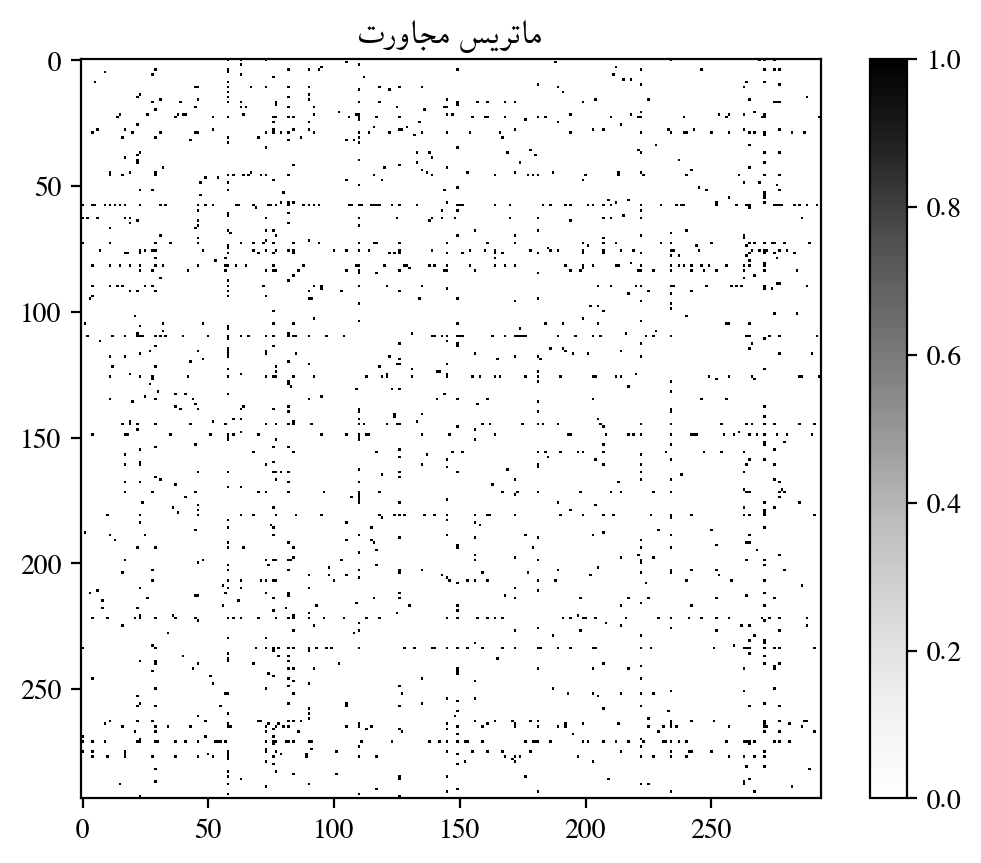

max clustering coeff  :   0.6666666666666666


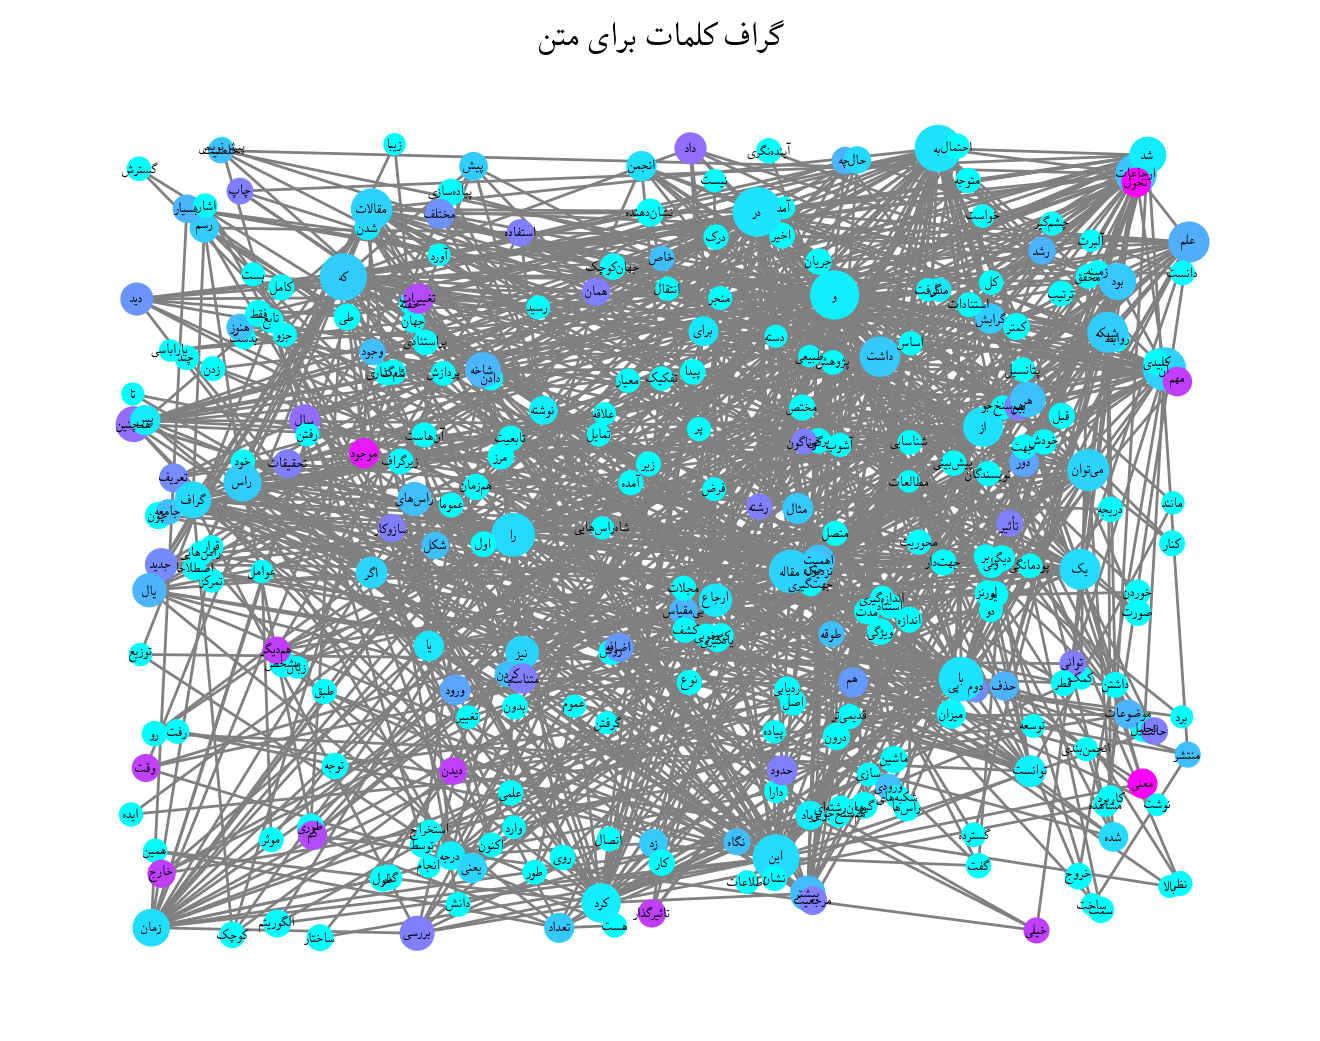

Nodes: ['افعی', 'تا', 'عقرب', 'خود', 'چون', 'زاتش', 'باغ', 'باید', 'خاک', 'شیدا', 'بسید', 'بغیر', 'بباید', 'حنظل', 'نیز', 'اهل', 'بالا', 'گفت', 'دور', 'سودا', 'جویبار', 'ننشاند', 'رسوا', 'صد', 'تن', 'عمر', 'پست', 'بیندیشی', 'دردمند', 'چشم', 'بنام', 'زمانه', 'شمرد', 'شمع', 'و', 'تماشا', 'عبرت', 'زینجا', 'عارف', 'دارا', 'مجوی', 'حاجت', 'سخن', 'بشناس', 'صخره', 'آرامش', 'مسکین', 'مریم', 'نیامده', 'بشکاف', 'تمنا', 'را', 'سیر', 'بی', 'هزار', 'غم', 'می\u200cنتوان', 'روان', 'شناخت', 'این', 'شایان', 'لکن', 'نیک', 'آلوده', 'خوابگاه', 'دوست', 'تیره\u200cروز', 'صما', 'افسون', 'سعادت', 'می\u200cنباش', 'دراز', 'مرکب', 'روش', 'گم', 'بهشت', 'نابینا', 'عبث', 'یلدا', 'گلشن', 'آنگه', 'مشمار', 'از', 'چو', 'سحر', 'زیراک', 'مخور', 'مکن', 'کردن', 'قصه', 'کرد', 'پرده', 'بند', 'کن', 'راند', 'گنبد', 'هرگز', 'خودرایی', 'عقل', 'مرغ', 'قفس', 'بس', 'راهنوردستی', 'جوزا', 'پهنا', 'سیه', 'جستن', 'تو', 'کنده', 'ای', 'یک', 'عذرا', 'آر', 'مصفا', 'رفته', 'شب', 'شهیدانست', 'دید', 'سوز', 'گداز', 'دیدار', 'پیش', 'فرو', 'پیون

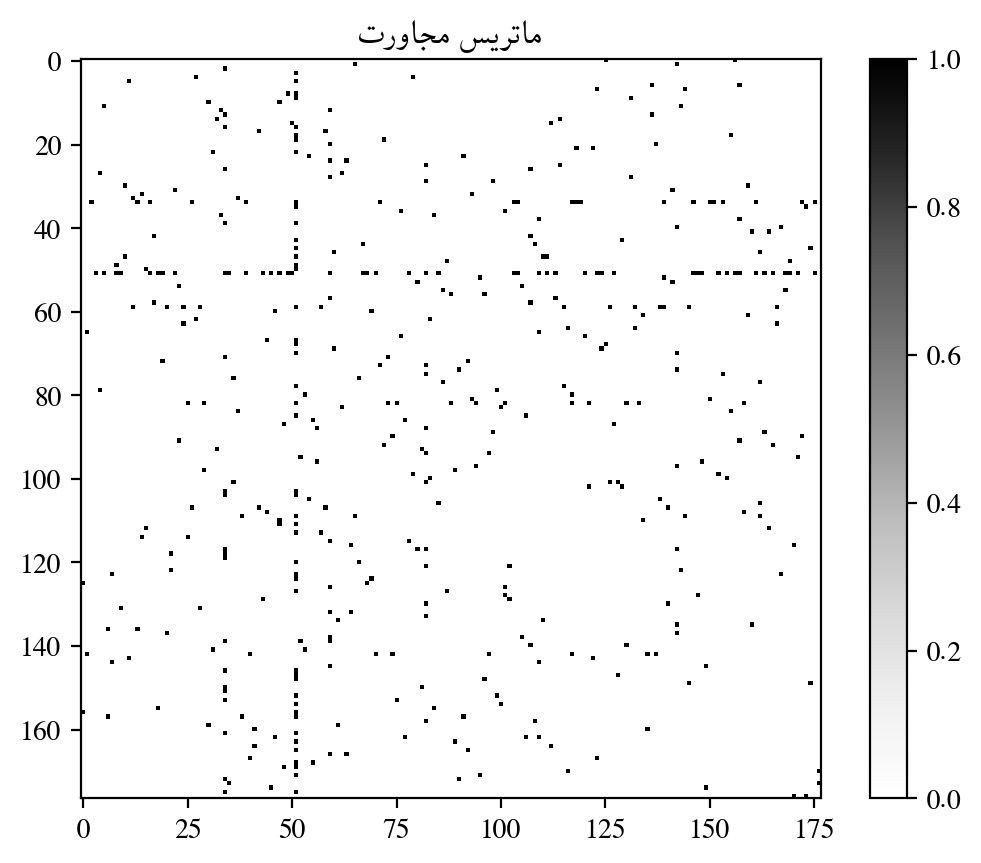

max clustering coeff  :   0.16666666666666666


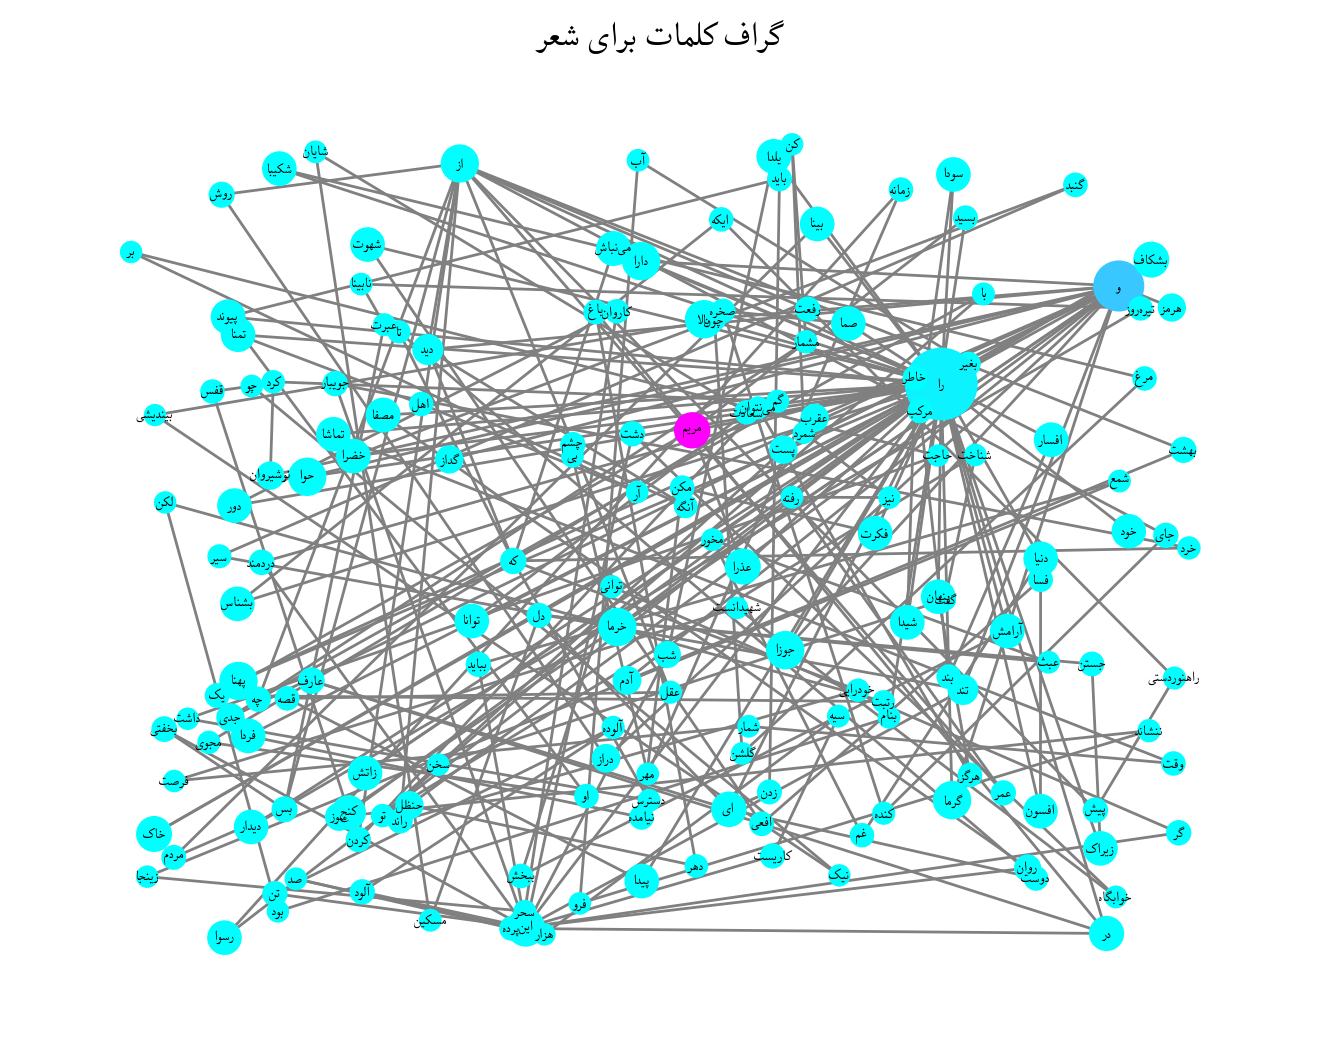

In [113]:
words_prose = lemmatized_prose
words_poem = lemmatized_poem

def persian(string):
    return get_display(arabic_reshaper.reshape(string))

def graph_creator(words,str):
    G = nx.Graph()
    for word in set(words):
        G.add_node(word)
    for i in range(len(words) - 1):
        G.add_edge(words[i], words[i + 1])
    print("Nodes:", G.nodes())
    print("Edges:", G.edges())
    #np.set_printoptions(threshold=np.inf)
    #print(nx.adjacency_matrix(G).todense())
    adj_array = np.array(nx.adjacency_matrix(G).todense())
    #np.savetxt('adjacency_matrix.txt', adj_array, fmt='%d')

    adj_matrix_bw = np.where(adj_array > 0, 1, 0)
    plt.imshow(adj_matrix_bw, cmap="Greys", interpolation="nearest")
    plt.colorbar()
    plt.title(persian('ماتریس مجاورت'))
    plt.show()
    
    #closeness = nx.closeness_centrality(G)
    #betweenness = nx.betweenness_centrality(G)
    eigenness = nx.eigenvector_centrality(G)
    clustering = nx.clustering(G)
    #pos = nx.spring_layout(G)
    #pos = nx.circular_layout(G)
    pos = nx.random_layout(G)
    clustering_coeffs = list(clustering.values())
    degrees = np.array([d for n, d in G.degree()])
    node_colors = [clustering_coeffs[i] if degrees[i]>=4 else 0 for i in range(len(clustering_coeffs))]
    print('max clustering coeff  :  ', max(node_colors))
    #nx.draw(G, pos, with_labels=False, node_size=2*degrees, node_color=node_colors, cmap=plt.cm.cool, edge_color='gray', width=0.5) # draw the nodes and edges
    nx.draw(G, pos, with_labels=False, node_size=[v * 900 + 50 for v in eigenness.values()], node_color=node_colors, cmap=plt.cm.cool, edge_color='gray') # draw the nodes and edges
    nx.draw_networkx_labels(G, pos, labels={word: persian(word) for word in G.nodes()}, font_family='Yas', font_size=5) # draw the labels
    plt.title(persian(f"گراف کلمات برای {str}"))
    plt.show() 
    return G

G_prose = graph_creator(words_prose,'متن')
G_poem = graph_creator(words_poem,'شعر')

### Creating Colormap

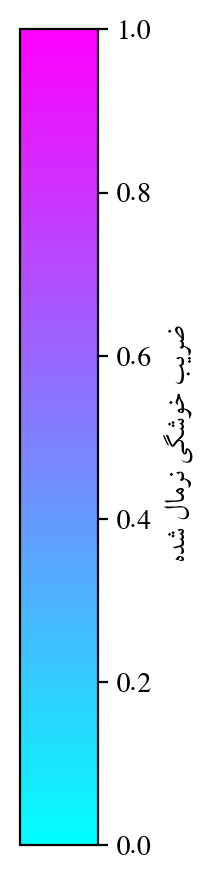

In [114]:
fig, ax = plt.subplots(figsize=(0.5, 6))
fig.subplots_adjust(bottom=0.2)
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')
cb1.set_label(persian(" ضریب خوشگی نرمال‌ شده"))
plt.show()

### Node Degrees

In [115]:
def degree_info(G):
    degrees = list(G.degree())
    edges = list(G.edges())
    degrees.sort(key=lambda x: x[1], reverse=True)
    avg_deg = 2 * len(edges) / len(degrees)
    print(degrees)
    print('Number of Nodes: ',len(degrees))
    print('Number of Edges: ',len(edges))
    print('Average Degree: ',avg_deg)
    avg_cc = nx.average_clustering(G)
    print('Average Clustering Coefficient: ',avg_cc)
    #avg_node_con = nx.average_node_connectivity(G)
    #print('Average Node Connectivity: ',avg_node_con)
    #avg_deg_con = nx.average_degree_connectivity(G)
    #print('Average Degree Connectivity: ',avg_deg_con)
    ass = nx.degree_assortativity_coefficient(G)
    print('Degree Assortativity Coefficient: ', ass, '\n')

    """for node, degree in G.degree():
        print(node, degree)"""
print('PROSE')
degree_info(G_prose)
print('POEM')
degree_info(G_poem)

PROSE
[('و', 66), ('در', 55), ('به', 48), ('این', 42), ('با', 41), ('که', 39), ('را', 36), ('کرد', 34), ('از', 32), ('مقاله', 32), ('آن', 31), ('یک', 30), ('می\u200cتوان', 29), ('مقالات', 27), ('شبکه', 26), ('ارجاعات', 26), ('شد', 25), ('داشت', 24), ('زمان', 23), ('علم', 22), ('راس', 21), ('گراف', 21), ('بود', 18), ('توانست', 17), ('ارجاع', 17), ('حوزه', 17), ('بیشتر', 16), ('نیز', 15), ('یا', 15), ('هر', 14), ('شاخه', 13), ('راس\u200cهای', 12), ('برای', 12), ('همچنین', 11), ('یال', 11), ('درجه', 10), ('میزان', 10), ('بررسی', 10), ('زیاد', 10), ('اگر', 10), ('پس', 9), ('انجمن', 9), ('اهمیت', 9), ('جدید', 9), ('دید', 9), ('تعداد', 9), ('یعنی', 9), ('زد', 8), ('مثال', 8), ('داد', 7), ('نوشته', 7), ('شده', 7), ('دور', 7), ('سال', 7), ('ورود', 7), ('حال', 7), ('مختلف', 7), ('بی\u200cمقیاس', 6), ('گرایش', 6), ('رسم', 6), ('ولی', 6), ('بسیار', 6), ('هم', 6), ('متناسب', 6), ('تغییرات', 6), ('موضوعات', 6), ('پیش', 6), ('مدل', 6), ('حدود', 6), ('شدن', 6), ('کم', 6), ('رشد', 6), ('اضافه', 6), ('

### Degree Dist and $p(k)$

[66, 55, 48, 42, 41, 39, 36, 34, 32, 32, 31, 30, 29, 27, 26, 26, 25, 24, 23, 22, 21, 21, 18, 17, 17, 17, 16, 15, 15, 14, 13, 12, 12, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 

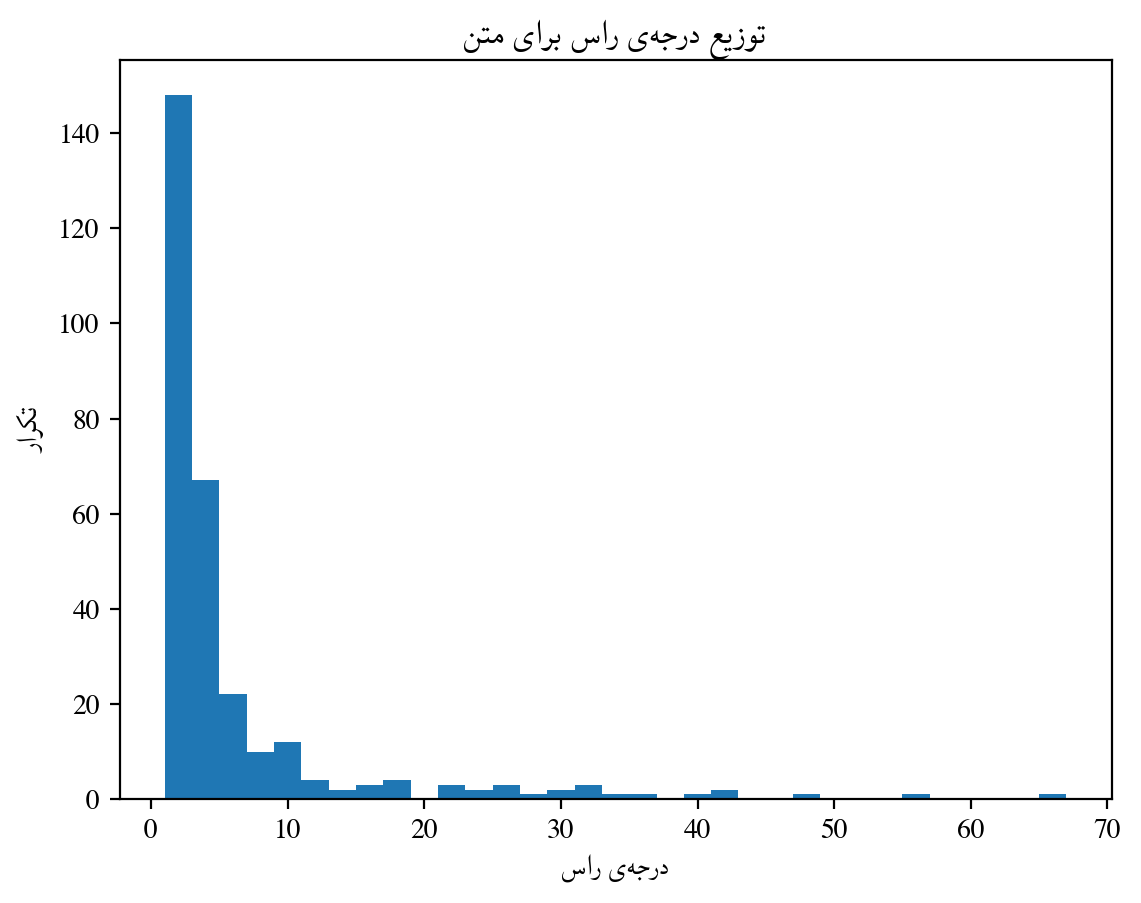

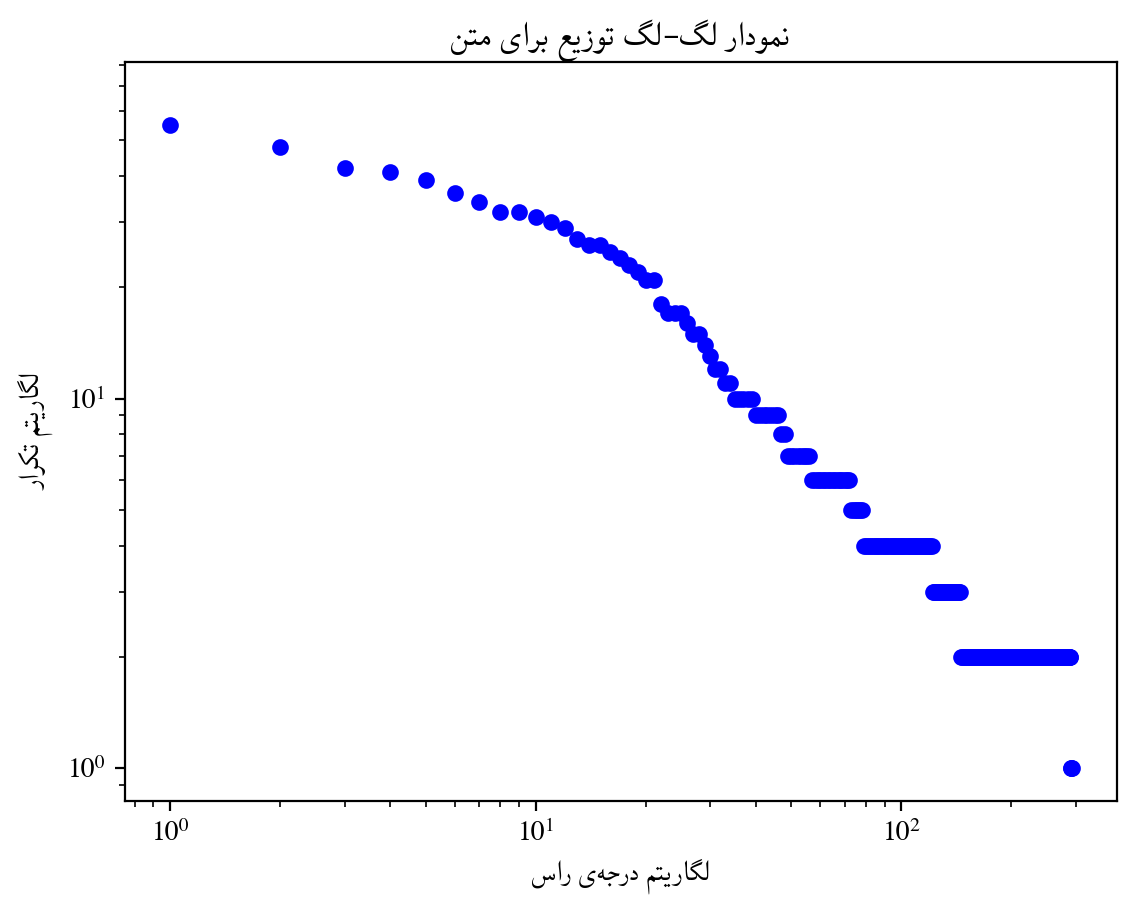

[1, 3, 5, 7, 9, 11, 13, 15, 17, 21, 23, 25, 27, 29, 31, 33, 35, 39, 41, 47, 55, 65] [148, 67, 22, 10, 12, 4, 2, 3, 4, 3, 2, 3, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1]
[0.         0.47712125 0.69897    0.84509804 0.95424251 1.04139269
 1.11394335 1.17609126 1.23044892 1.32221929 1.36172784 1.39794001
 1.43136376 1.462398   1.49136169 1.51851394 1.54406804 1.59106461
 1.61278386 1.67209786 1.74036269 1.81291336] [2.17026172 1.8260748  1.34242268 1.         1.07918125 0.60205999
 0.30103    0.47712125 0.60205999 0.47712125 0.30103    0.47712125
 0.         0.30103    0.47712125 0.         0.         0.
 0.30103    0.         0.         0.        ]
-1.3101657174059813 2.1708701414077374
[0.         0.47712125 0.69897    0.84509804 0.95424251 1.04139269
 1.11394335 1.17609126 1.23044892 1.32221929 1.36172784 1.39794001
 1.43136376 1.462398   1.49136169 1.51851394 1.54406804 1.59106461
 1.61278386 1.67209786 1.74036269 1.81291336] [ 2.17087014  1.54576223  1.2551036   1.06365166  0.92065432  0.8064731

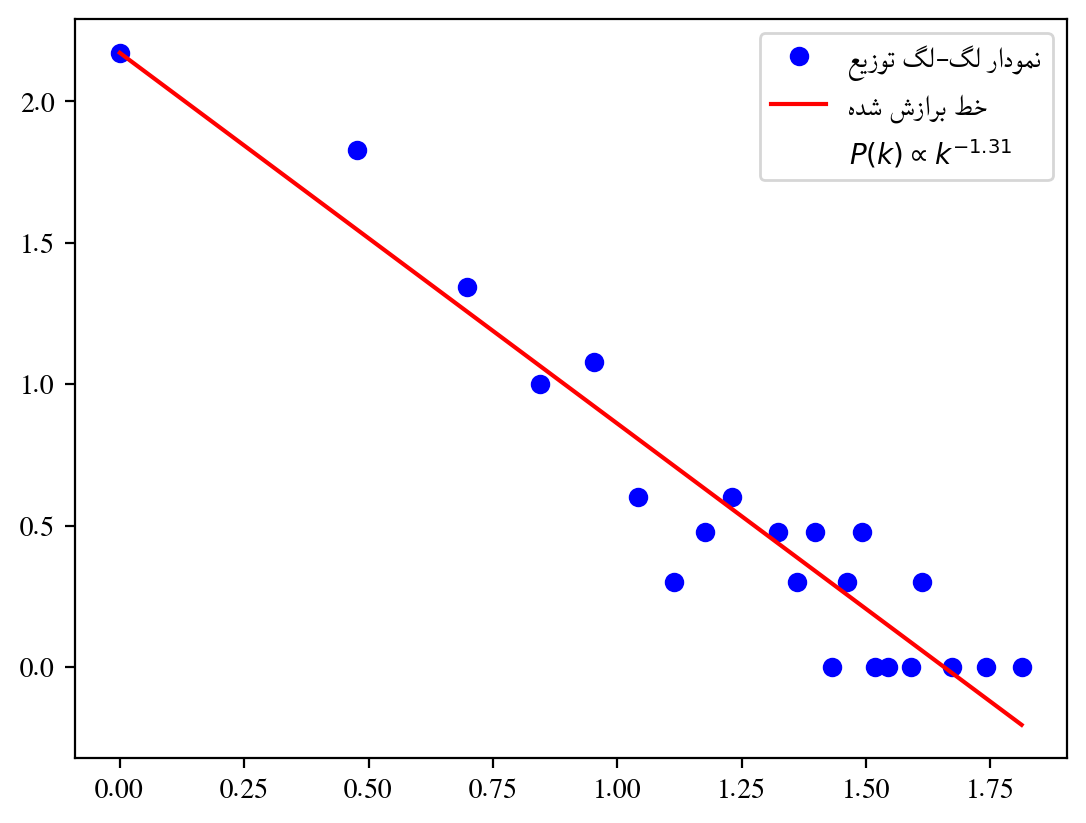

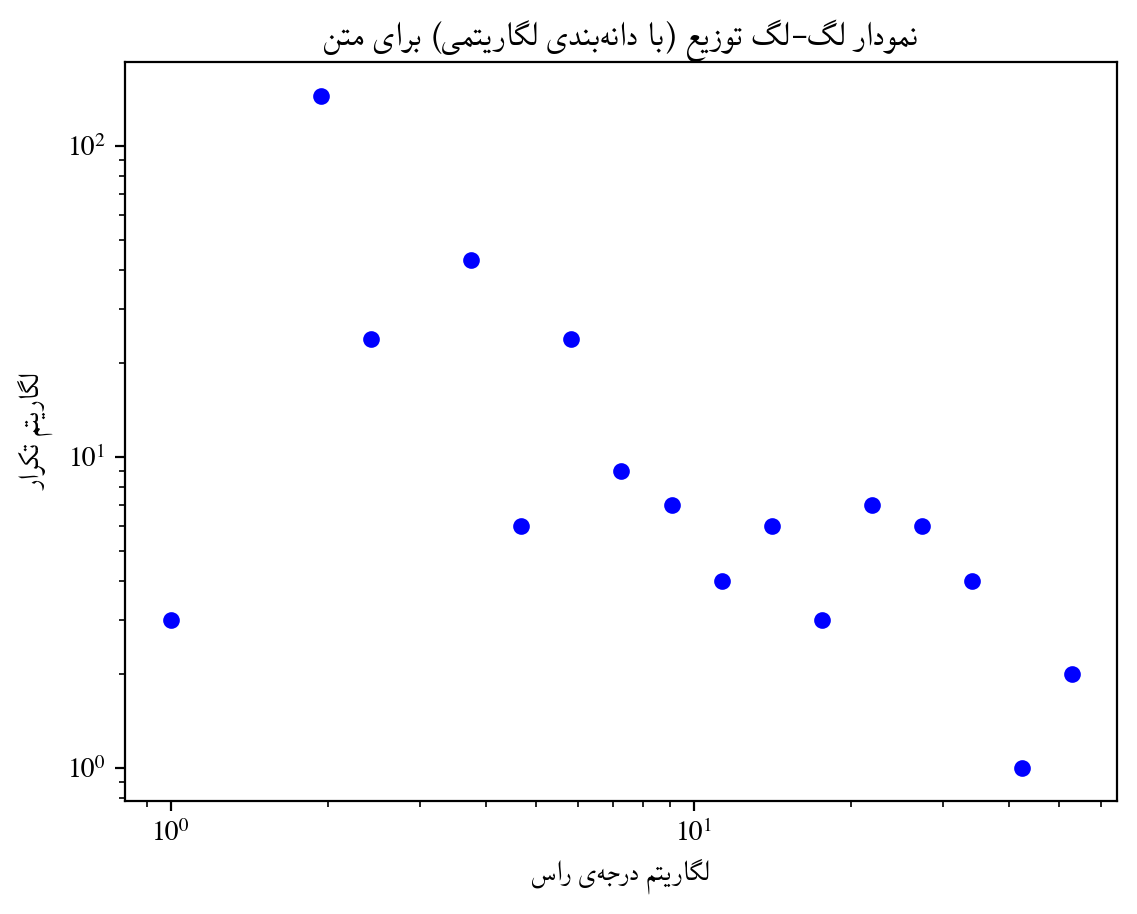

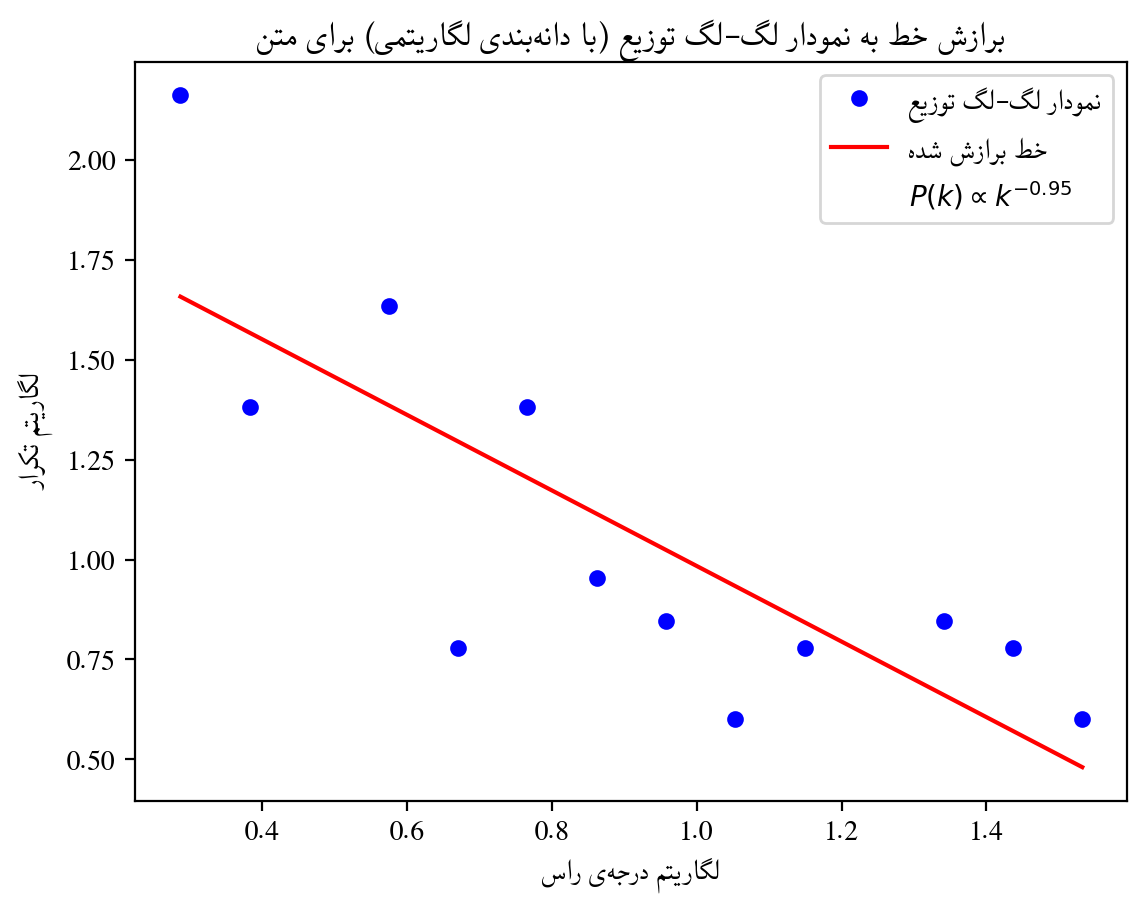

[0.28729641 0.38306188 0.57459282 0.67035829 0.76612376 0.86188923
 0.9576547  1.05342017 1.14918564 1.34071658 1.43648205 1.53224752]
[2.161368   1.38021124 1.63346846 0.77815125 1.38021124 0.95424251
 0.84509804 0.60205999 0.77815125 0.84509804 0.77815125 0.60205999]
[46, 20, 13, 13, 8, 5, 4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47]


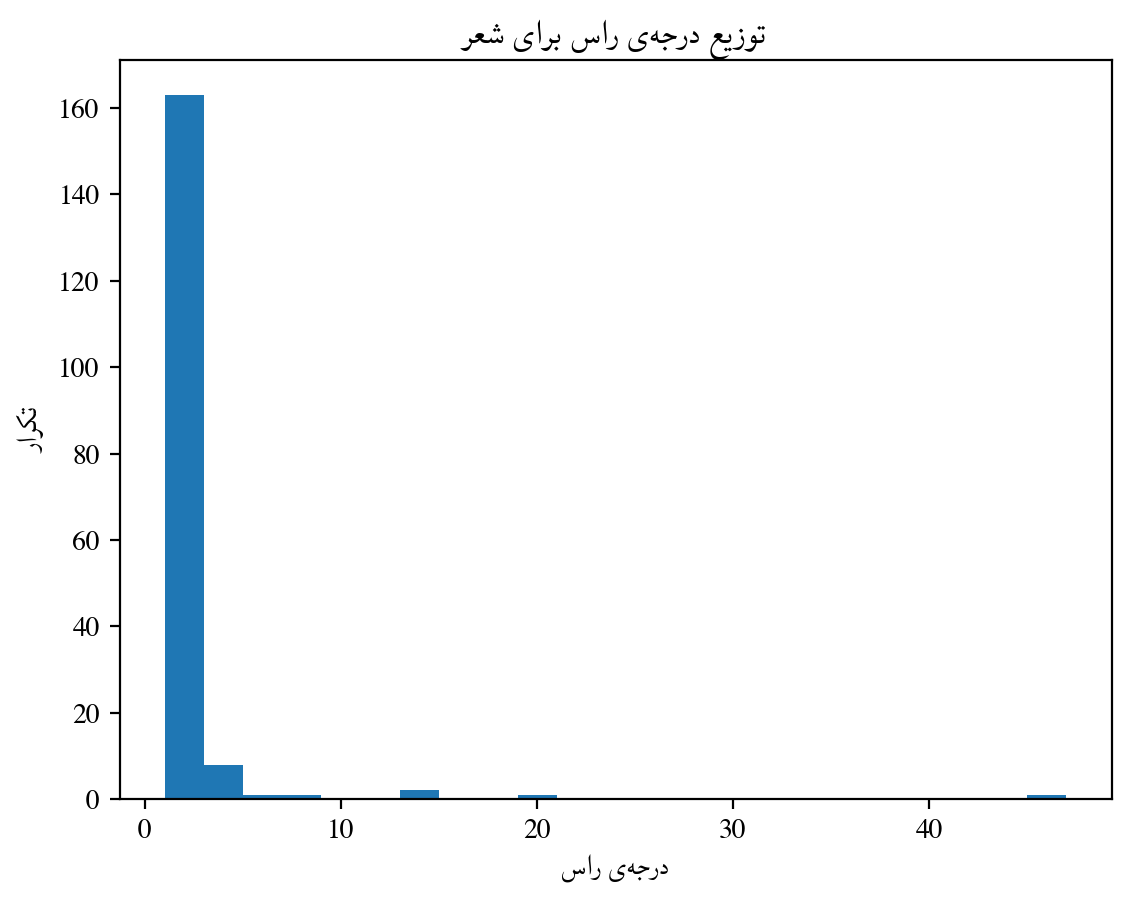

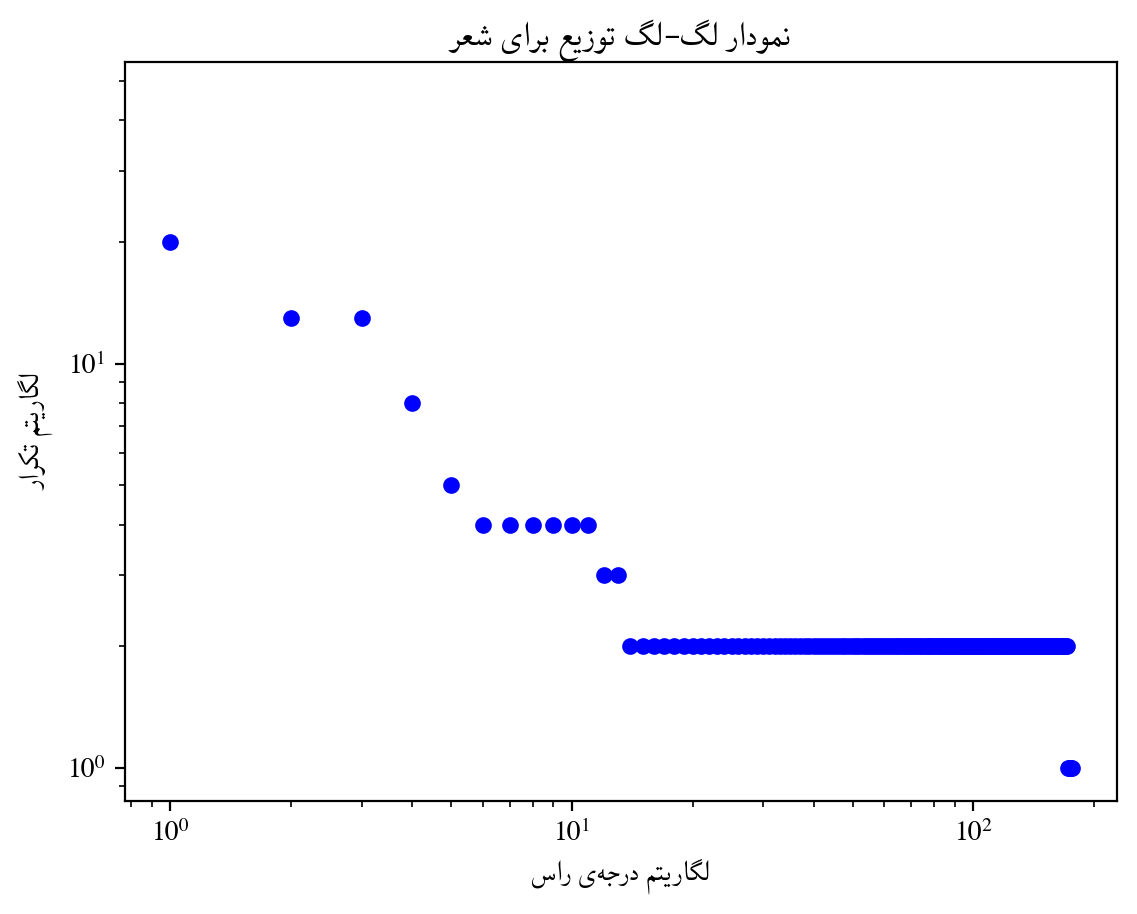

[1, 3, 5, 7, 13, 19, 45] [163, 8, 1, 1, 2, 1, 1]
[0.         0.47712125 0.69897    0.84509804 1.11394335 1.2787536
 1.65321251] [2.2121876  0.90308999 0.         0.         0.30103    0.
 0.        ]
-1.2322982807705678 1.5561118522566055
[0.         0.47712125 0.69897    0.84509804 1.11394335 1.2787536
 1.65321251] [ 1.55611185  0.96815615  0.69477232  0.51469899  0.18340137 -0.01969401
 -0.48113909]


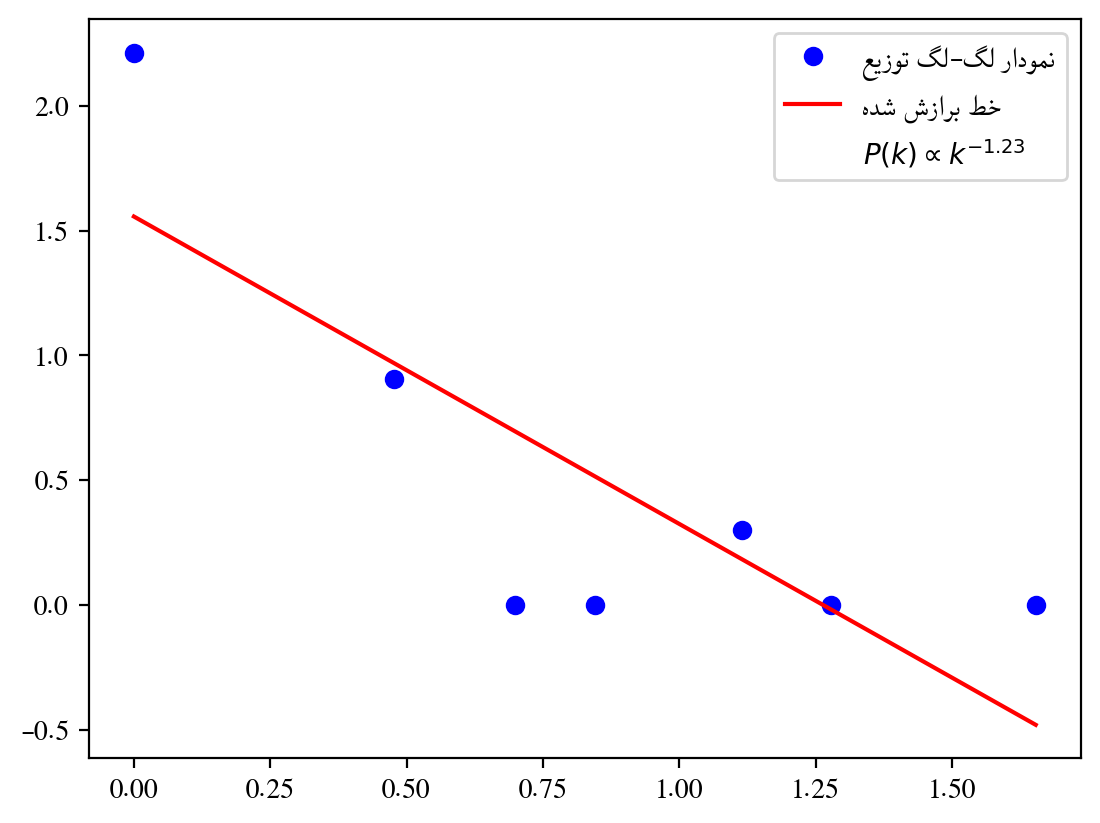

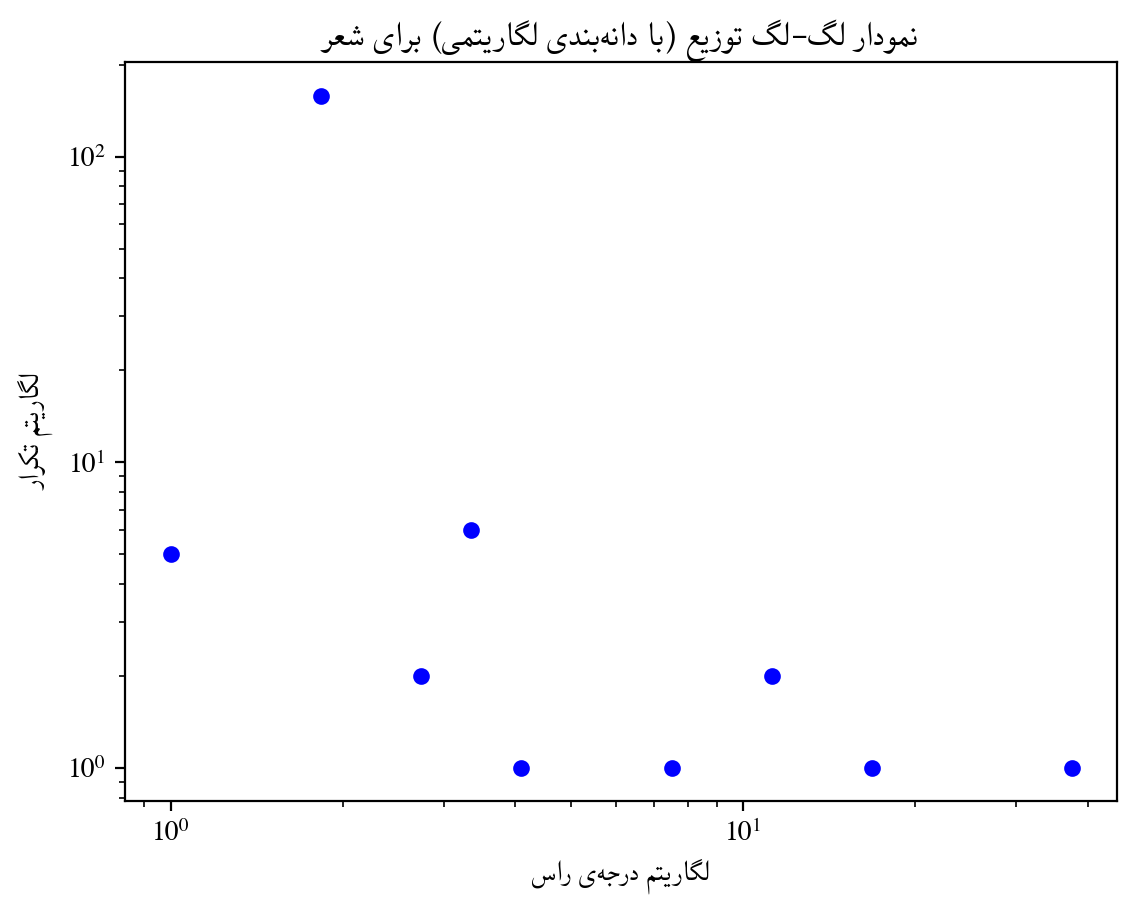

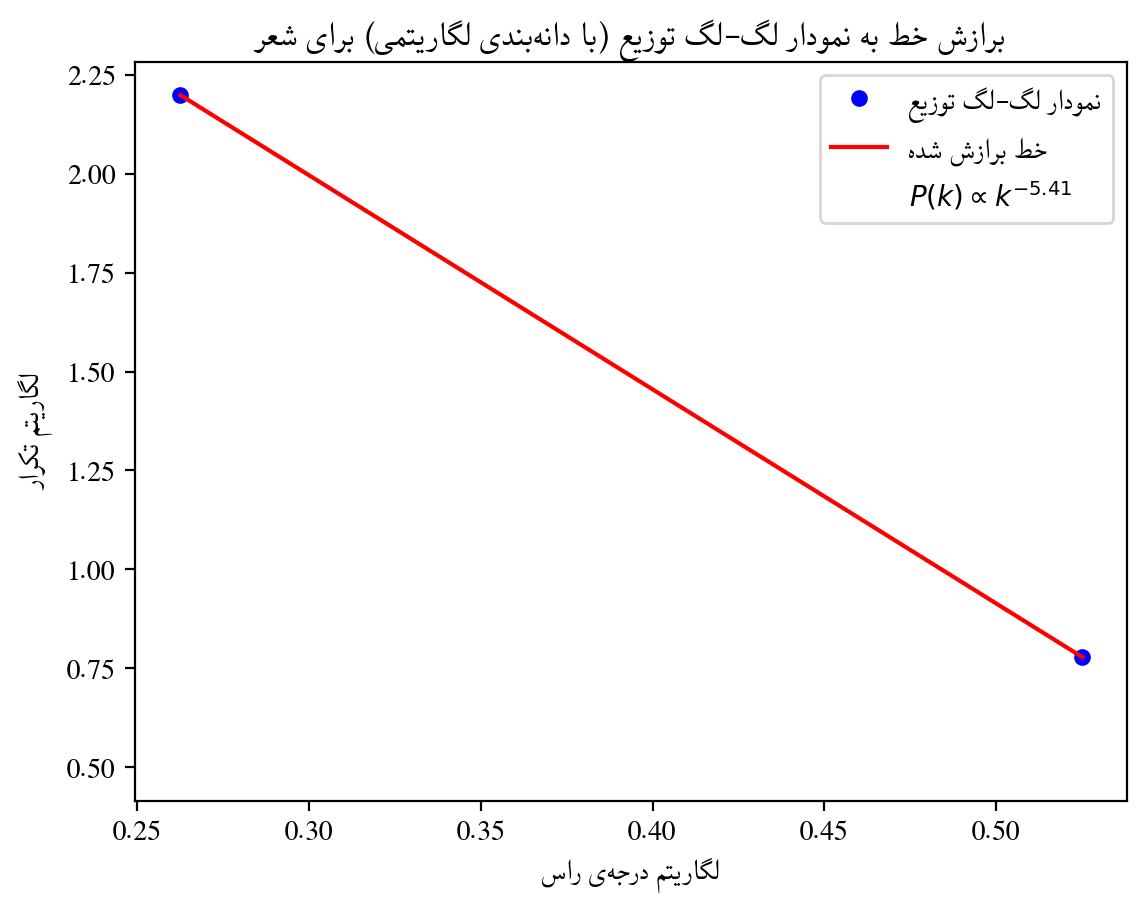

[0.26254071 0.52508142]
[2.19865709 0.77815125]


In [116]:
def hist_plot(G, text_type):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    hist_bins = np.arange(min(degree_sequence), max(degree_sequence) + 2, 2)
    print(degree_sequence)
    print(hist_bins)
    plt.hist(degree_sequence, bins = hist_bins)
    plt.xlabel(persian("درجه‌ی راس"))
    plt.ylabel(persian("تکرار"))
    plt.title(persian(f"توزیع درجه‌ی راس برای {text_type}"))
    plt.show()

    plt.loglog(degree_sequence, 'bo', markersize = 5)
    plt.xlabel(persian("لگاریتم درجه‌ی راس"))
    plt.ylabel(persian("لگاریتم تکرار"))
    plt.title(persian(f"نمودار لگ-لگ توزیع برای {text_type}"))
    plt.show()

    hist_demo, g = np.histogram(degree_sequence, bins=hist_bins)
    hist_bins = hist_bins[:len(hist_bins)-1]
    nz_hist_bins = [hist_bins[i] for i in range(len(hist_bins)) if hist_bins[i]]
    nz_hist_demo = [hist_demo[i] for i in range(len(hist_demo)) if hist_bins[i]]
    nz_hist_demo_1 = [nz_hist_demo[i] for i in range(len(nz_hist_demo)) if nz_hist_demo[i]]
    nz_hist_bins_1 = [nz_hist_bins[i] for i in range(len(nz_hist_bins)) if nz_hist_demo[i]]
    hist_demo = nz_hist_demo_1
    hist_bins = nz_hist_bins_1
    print(hist_bins,hist_demo)
    log_deg = np.log10(hist_demo)
    log_hist_bins = np.log10(hist_bins)
    #log_hist_bins = log_hist_bins[:len(log_hist_bins)-1]
    print(log_hist_bins,log_deg)
    m0, b0 = np.polyfit(log_hist_bins, log_deg, 1)
    print(m0,b0)
    y0 = m0 * log_hist_bins + b0
    print(log_hist_bins,y0)
    plt.plot(log_hist_bins,log_deg,'bo')
    plt.plot(log_hist_bins, y0, 'r-', linewidth=1.5)
    plt.plot([0.5], [0.5], 'wo', markersize=0.1)
    plt.legend([persian('نمودار لگ-لگ توزیع'), persian('خط برازش شده'), f'$P(k)\propto k^{"{"+str(round(m0,2))+"}"}$'], loc='upper right')
    #plt.plot(hist_demo,hist_bins[:len(hist_bins)-1],'ro')
    plt.show()

    bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), 20)
    hist, g = np.histogram(degree_sequence, bins=bins)
    plt.plot(bins[:-1], hist, 'bo', markersize=5)  # Plot blue dots
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(persian("لگاریتم درجه‌ی راس"))
    plt.ylabel(persian("لگاریتم تکرار"))
    plt.title(persian(f"نمودار لگ-لگ توزیع (با دانه‌بندی لگاریتمی) برای {text_type}"))
    plt.show()

    # These arrays are for deleting zeros and corresponding number in other one
    nz_hist = [hist[i] for i in range(len(hist)) if hist[i]]
    new_bins = bins[0:len(bins)-1]
    nz_bins = [new_bins[i] for i in range(len(new_bins)) if hist[i]]
    log_bins = np.log10(nz_bins)
    log_hist = np.log10(nz_hist)
    nz_log_hist_1 = [log_hist[i] for i in range(len(log_hist)) if log_hist[i]]
    nz_log_bins_1 = [log_bins[i] for i in range(len(log_bins)) if log_hist[i]]
    nz_log_bins = [nz_log_bins_1[i] for i in range(len(nz_log_bins_1)) if nz_log_bins_1[i]]
    nz_log_hist = [nz_log_hist_1[i] for i in range(len(nz_log_hist_1)) if nz_log_bins_1[i]]
    # under 0.5 removres:
    n05_log_hist = [nz_log_hist[i] for i in range(len(nz_log_hist)) if nz_log_hist[i]>0.5]
    n05_log_bins = [nz_log_bins[i] for i in range(len(nz_log_bins)) if nz_log_hist[i]>0.5]

    nz_log_bins = n05_log_bins
    nz_log_hist = n05_log_hist

    nz_log_bins = np.array(nz_log_bins)
    nz_log_hist = np.array(nz_log_hist)

    m, b = np.polyfit(nz_log_bins, nz_log_hist, 1)
    y = m * nz_log_bins + b
    plt.plot(nz_log_bins, nz_log_hist, 'bo', markersize=5)  # Plot blue dots
    plt.plot(nz_log_bins, y, 'r-', linewidth=1.5)
    plt.plot([0.5], [0.5], 'wo', markersize=0.1)
    plt.xlabel(persian("لگاریتم درجه‌ی راس"))
    plt.ylabel(persian("لگاریتم تکرار"))
    plt.title(persian(f"برازش خط به نمودار لگ-لگ توزیع (با دانه‌بندی لگاریتمی) برای {text_type}"))
    plt.legend([persian('نمودار لگ-لگ توزیع'), persian('خط برازش شده'), f'$P(k)\propto k^{"{"+str(round(m,2))+"}"}$'], loc='upper right')
    plt.show()
    print(nz_log_bins)
    print(nz_log_hist)

hist_plot(G_prose, 'متن')
hist_plot(G_poem, 'شعر')

### Modularity and Clustering

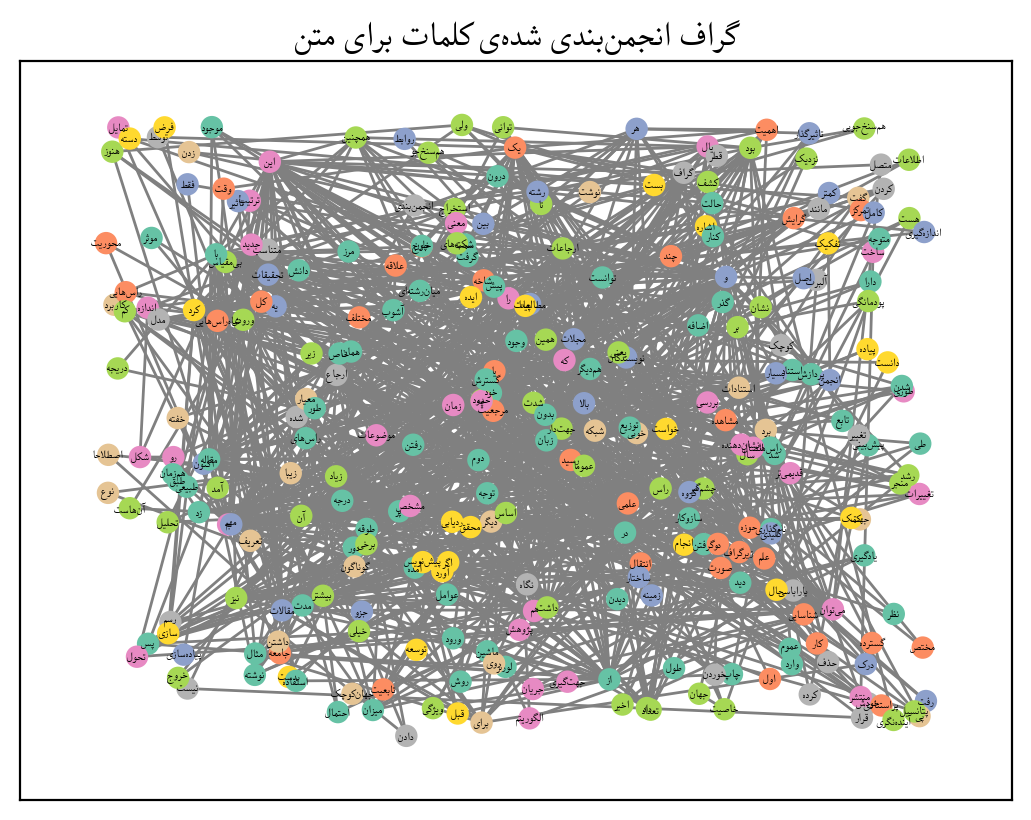

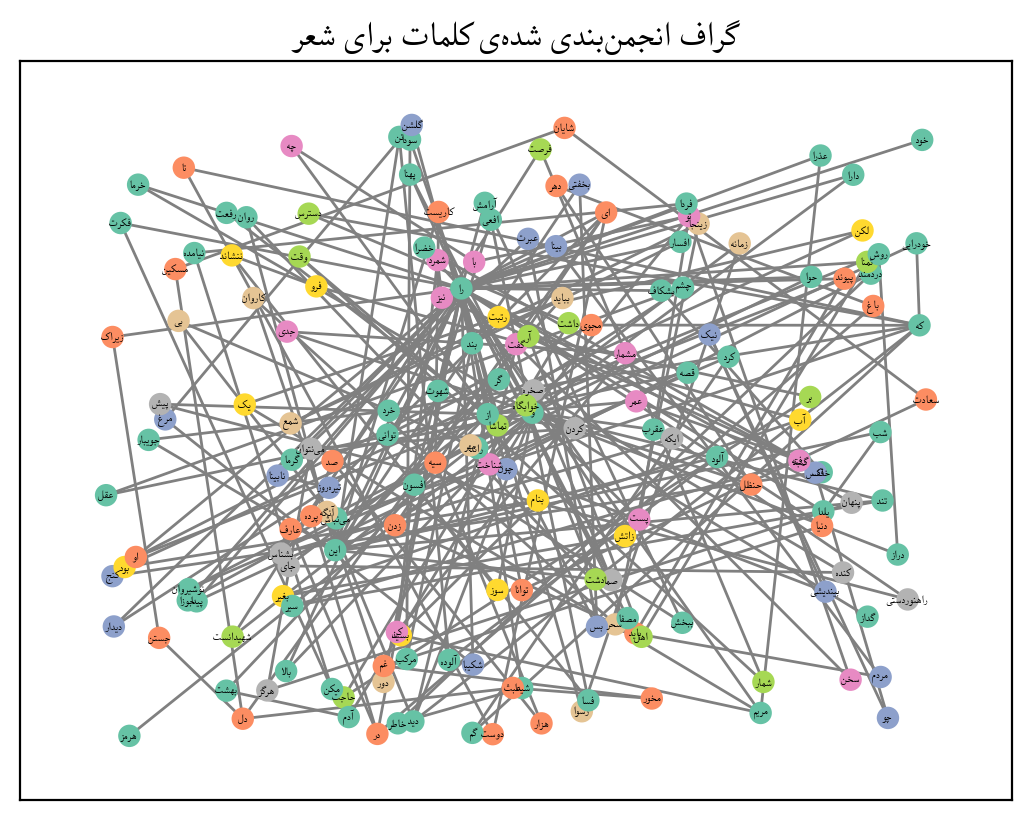

In [117]:
def modularity(G, text_type):
    communities = nx.algorithms.community.greedy_modularity_communities(G)
    node_colors = {}
    for i, community in enumerate(communities):
        for node in community:
            node_colors[node] = i
    #pos = nx.spring_layout(G)
    pos = nx.random_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes], cmap=plt.cm.Set2, node_size=50)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, labels={word: persian(word) for word in G.nodes()}, font_family='Yas', font_size=4) # draw the labels
    plt.title(persian(f"گراف انجمن‌بندی شده‌ی کلمات برای {text_type}"))
    plt.show()

modularity(G_prose, 'متن')
modularity(G_poem, 'شعر')

#### Girvan Newman Algorithm

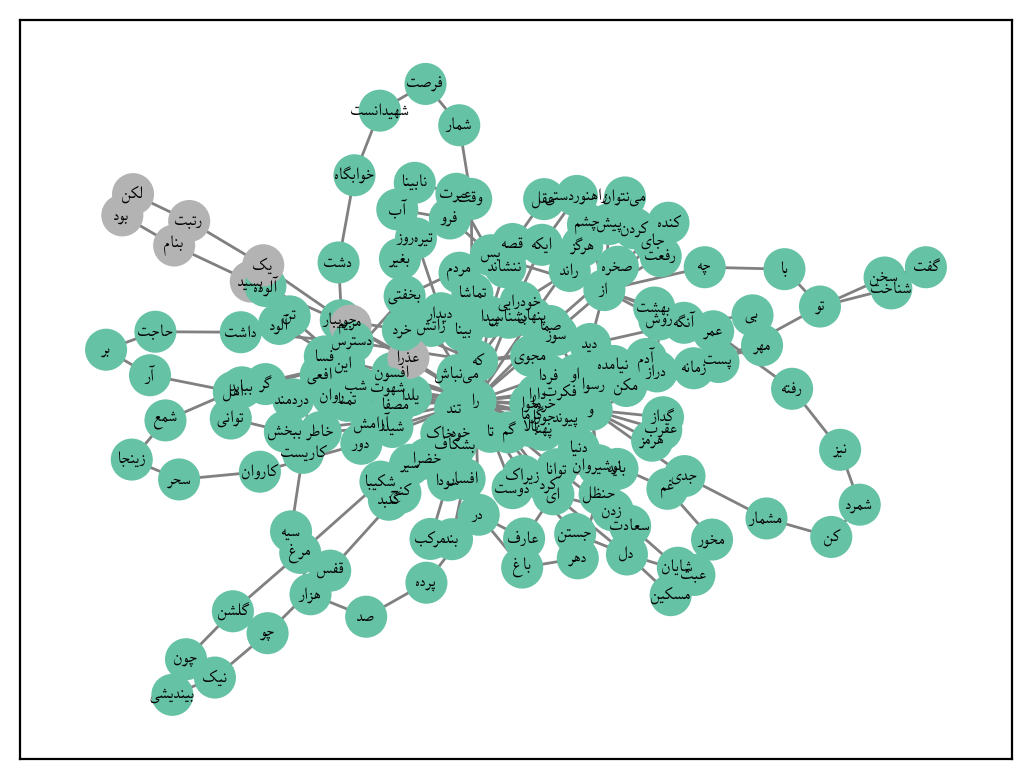

In [118]:
G = G_poem

communities = list(nx.algorithms.community.girvan_newman(G))
best_partition = next(c for c in communities if len(c) <= 10)  # Adjust threshold as needed
node_colors = {}
for i, community in enumerate(best_partition):
    for node in community:
        node_colors[node] = i
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes], cmap=plt.cm.Set2, node_size=200)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, labels={word: persian(word) for word in G.nodes()}, font_family='Yas', font_size=6)
plt.show()


#### Small Worldness

In [119]:
def random_connected_graph_like_G(G):
    while True:
        random_graph = nx.gnm_random_graph(nx.number_of_nodes(G), nx.number_of_edges(G))
        if nx.is_connected(random_graph)==True:
            break
    return random_graph
def small_world(G):
    avg_shortest_path_length = nx.average_shortest_path_length(G)
    print("special length our graph: ",avg_shortest_path_length)
    clustering_coefficient = nx.average_clustering(G)
    print("avg clustering coeff of our graph: ",clustering_coefficient)
    arr_avg_shortest_path_length_random = []
    arr_clustering_coefficient_random = []
    for i in range(2):
        random_graph = random_connected_graph_like_G(G)
        avg_shortest_path_length_random_i = nx.average_shortest_path_length(random_graph)
        clustering_coefficient_random_i = nx.average_clustering(random_graph)
        arr_avg_shortest_path_length_random.append(avg_shortest_path_length_random_i)
        arr_clustering_coefficient_random.append(clustering_coefficient_random_i)
    avg_shortest_path_length_random = sum(arr_avg_shortest_path_length_random)/len(arr_avg_shortest_path_length_random)
    clustering_coefficient_random = sum(arr_clustering_coefficient_random)/len(arr_clustering_coefficient_random)
    print("special length of random graph: ",avg_shortest_path_length_random)
    print("avg clustering coeff of random graph: ",clustering_coefficient_random)
    #sigma = nx.sigma(G, random_graph)
print("PROSE")
small_world(G_prose)
print("POEM")
small_world(G_poem)

PROSE


special length our graph:  2.9239163242088644
avg clustering coeff of our graph:  0.20525620493652744
special length of random graph:  3.3754730561166446
avg clustering coeff of random graph:  0.01851369529940957
POEM
special length our graph:  4.150680534155111
avg clustering coeff of our graph:  0.05769607019267649


KeyboardInterrupt: 